In [81]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Gaussian Now
from sklearn import preprocessing


In [82]:
df = pd.read_csv("C:/Users/Jackson/Documents/Marquette Classes/DataMining/adult-modified.csv",)
df = df.rename(columns={'marital-status': 'marital_status'})


,age,workclass,education,marital_status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K
6,49,Private,5,Married,Black,Female,16,<=50K
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K


In [83]:
#replace any? with nan
df['age'] = df['age'].replace("?", np.nan)
df['education'] = df['education'].replace("?", np.nan)
df['hours-per-week'] = df['hours-per-week'].replace("?", np.nan)


In [84]:
#Convert columns to numeric
df[["age", "education","hours-per-week"]] = df[["age", "education","hours-per-week"]].apply(pd.to_numeric)


In [108]:
#Find MEan
age_Mean = df["age"].mean()
age_std = df["age"].std()
education_Mean = df['education'].mean()
education_std = df["education"].std()
wage_Mean = df["hours-per-week"].mean()
wage_std = df["hours-per-week"].std()
#replace nan with mean for AGE and EDU
df['age'] = df['age'].replace( np.nan, age_Mean)
df['education'] = df['education'].replace(np.nan, education_Mean)
df["hours-per-week"] = df["hours-per-week"].replace(np.nan, wage_Mean)

df.describe()

,age,workclass,education,marital_status,race,sex,hours-per-week,income
count,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000
mean,38.366342,0.383872,10.125266,0.496706,3.670633,0.678177,41.080217,0.246388
std,12.962039,0.693188,2.542118,0.500016,0.844577,0.467200,11.884590,0.430930
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,9.000000,0.000000,4.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,10.000000,0.000000,4.000000,1.000000,40.000000,0.000000
75%,47.000000,1.000000,13.000000,1.000000,4.000000,1.000000,45.000000,0.000000
max,90.000000,2.000000,16.000000,1.000000,4.000000,1.000000,99.000000,1.000000


In [86]:
#remove rows with missing categorical values

#drop observations if NA is present
df = df[df.workclass != '?']
df = df[df.marital_status != '?']
df = df[df.race != '?']
df = df[df.sex != '?']
df = df[df.income != '?']




            age workclass  education marital_status         race     sex  \
0     39.000000    Public         13         Single        White    Male   
1     50.000000  Self-emp         13        Married        White    Male   
2     38.000000   Private          9         Single        White    Male   
3     53.000000   Private          7        Married        Black    Male   
4     28.000000   Private         13        Married        Black  Female   
5     37.000000   Private         14        Married        White  Female   
6     49.000000   Private          5        Married        Black  Female   
7     52.000000  Self-emp          9        Married        White    Male   
8     31.000000   Private         14         Single        White  Female   
9     42.000000   Private         13        Married        White    Male   
10    37.000000   Private         10        Married        Black    Male   
11    30.000000    Public         13        Married        Asian    Male   
12    23.000

(array([1487., 1738., 1929., 1825., 1178.,  713.,  378.,  107.,   37.,
          20.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

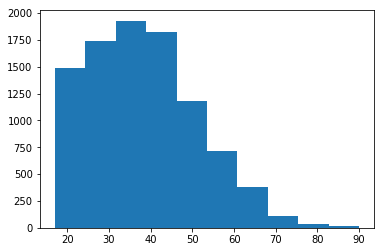

In [87]:
#histogram
plt.hist(df['age'])


(array([ 165.,  546.,  634., 5145.,  950., 1172.,  567.,  137.,   64.,
          32.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

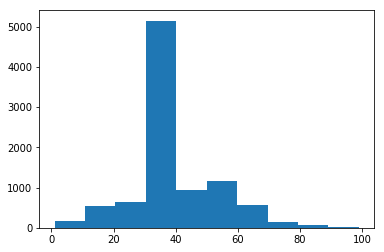

In [88]:
plt.hist(df['hours-per-week'])



(array([  58.,   81.,  322.,  268.,  424., 3065., 2514.,  304., 2092.,
         284.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

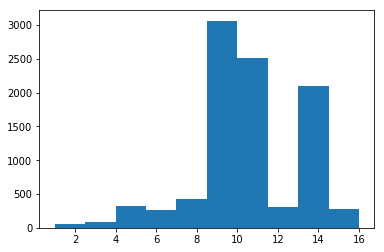

In [109]:
plt.hist(df['education'])
   
   

{'<=50K': 7093, '>50K': 2319}


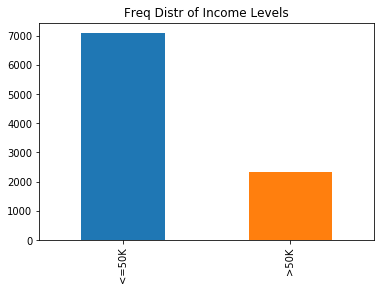

In [89]:
df['income'].value_counts().plot.bar(title = 'Freq Distr of Income Levels')


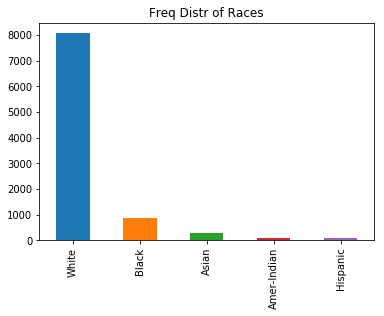

In [90]:
df['race'].value_counts().plot.bar(title = 'Freq Distr of Races')


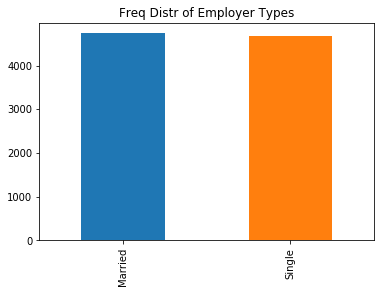

In [92]:
df['marital_status'].value_counts().plot.bar(title = 'Freq Distr of Employer Types')

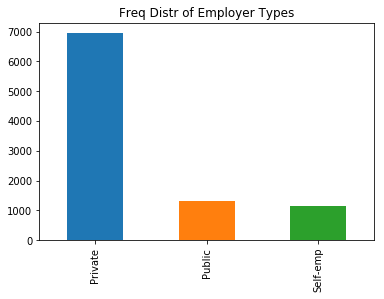

In [93]:
df['workclass'].value_counts().plot.bar(title = 'Freq Distr of Employer Types')


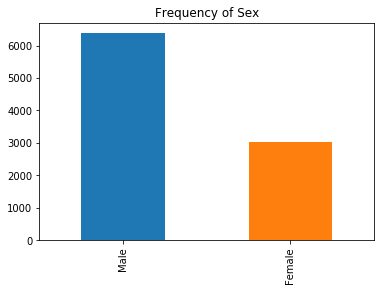

In [94]:
df['sex'].value_counts().plot.bar(title = 'Frequency of Sex')

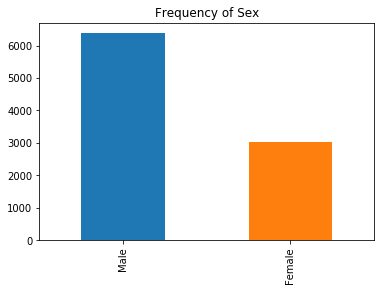

In [96]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [97]:
#Decision Tree
#split dataset in features and target variable
dcf = df


#convert categorical to numerical

dcf.sex=le.fit_transform(df['sex'])
dcf.race=le.fit_transform(df['race'])
dcf.workclass=le.fit_transform(df['workclass'])
dcf.marital_status=le.fit_transform(df['marital_status'])

dcf.income=le.fit_transform(df["income"])

feature_cols = ["age","education","race","sex","hours-per-week","workclass","marital_status"]
X = df[feature_cols] # Features
y = df.income # Target variable

In [98]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test


In [99]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()



In [100]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [101]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7801380775358471


In [102]:
#Decision tree Entropy
elf = DecisionTreeClassifier(criterion="entropy")
# Train Decision Tree Classifer
elf = elf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = elf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7774827403080191


In [103]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
dgf = df
dgf.sex=le.fit_transform(df['sex'])
dgf.race=le.fit_transform(df['race'])
dgf.workclass=le.fit_transform(df['workclass'])
dgf.marital_status=le.fit_transform(df['marital_status'])

dgf.income=le.fit_transform(df["income"])


In [104]:
#Combinig weather and temp into single listof tuples
feature_cols = ["age","education","race","sex","hours-per-week","workclass","marital_status"]
X = df[feature_cols] # Features
y = dgf.income # Target variable



In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [106]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [107]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7785448751991503


ModuleNotFoundError: No module named 'info_gain'